In [ ]:
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Acer\OneDrive\Documents\Datasets\Eyes_Dataset\Train",
    target_size=(256, 256),
    batch_size=16,
    class_mode='sparse',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Acer\OneDrive\Documents\Datasets\Eyes_Dataset\Test",
    target_size=(256, 256),
    batch_size=16,
    class_mode='sparse',
    shuffle=False
)


Found 4217 images belonging to 4 classes.
Found 768 images belonging to 4 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1536,activation='relu'))
model.add(Dense(4,activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [5]:
history=model.fit(train_generator,validation_data=test_generator,epochs=20)

Epoch 1/20


264/264 [==============================] - 311s 1s/step - loss: 1.2436 - accuracy: 0.4133 - val_loss: 1.0655 - val_accuracy: 0.5638
Epoch 2/20
264/264 [==============================] - 312s 1s/step - loss: 0.9534 - accuracy: 0.5907 - val_loss: 0.8429 - val_accuracy: 0.6654
Epoch 3/20
264/264 [==============================] - 309s 1s/step - loss: 0.8175 - accuracy: 0.6704 - val_loss: 0.6542 - val_accuracy: 0.8073
Epoch 4/20
264/264 [==============================] - 308s 1s/step - loss: 0.7256 - accuracy: 0.7157 - val_loss: 0.5962 - val_accuracy: 0.8190
Epoch 5/20
264/264 [==============================] - 314s 1s/step - loss: 0.6660 - accuracy: 0.7394 - val_loss: 0.4215 - val_accuracy: 0.8503
Epoch 6/20
264/264 [==============================] - 308s 1s/step - loss: 0.6155 - accuracy: 0.7591 - val_loss: 0.4380 - val_accuracy: 0.8503
Epoch 7/20
264/264 [==============================] - 309s 1s/step - loss: 0.5832 - accuracy: 0.7676 - val_loss: 0.4618 - val_accuracy: 0.85

In [22]:
print(train_generator.class_indices)
print(test_generator.class_indices)
model.evaluate(test_generator)


{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}
{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}
48/48 [==============================] - 18s 379ms/step - loss: 0.2012 - accuracy: 0.9323


[0.20120622217655182, 0.9322916865348816]

C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


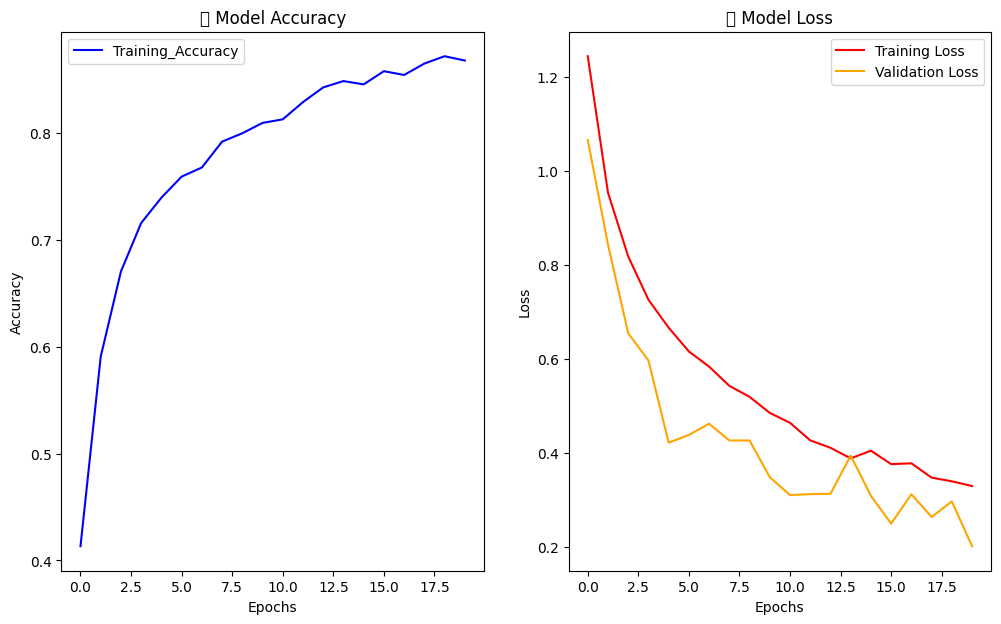

In [ ]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
val_loss=history.history["val_loss"]
loss=history.history["loss"]

epochs=range(len(acc))

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(epochs,acc,'b',label="Training_Accuracy")
plt.title('📈 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('📉 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
test_generator.reset()


In [39]:
loss, acc = model.evaluate(test_generator)
print("Keras accuracy:", acc)


48/48 [==============================] - 12s 251ms/step - loss: 0.2012 - accuracy: 0.9323
Keras accuracy: 0.9322916865348816


48/48 [==============================] - 12s 250ms/step
Sklearn Accuracy: 0.9322916666666666
                      precision    recall  f1-score   support

            cataract       0.93      0.92      0.92       192
diabetic_retinopathy       0.99      0.94      0.97       192
            glaucoma       0.88      0.95      0.91       192
              normal       0.94      0.93      0.93       192

            accuracy                           0.93       768
           macro avg       0.93      0.93      0.93       768
        weighted avg       0.93      0.93      0.93       768



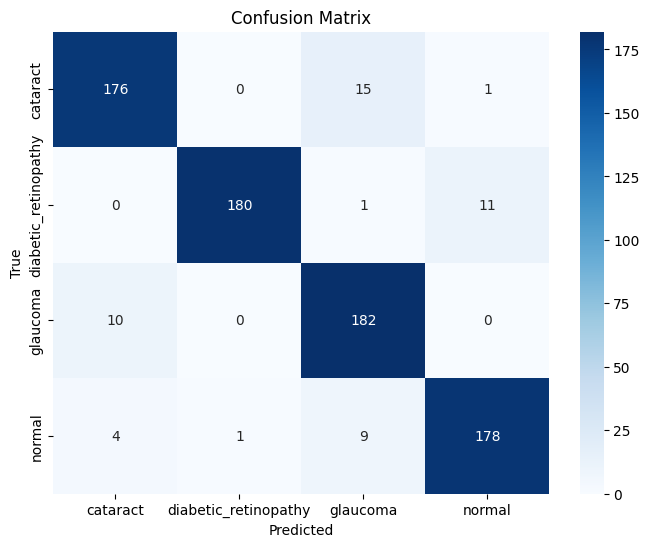

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_generator.classes

y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = list(test_generator.class_indices.keys())

print("Sklearn Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.save("eyes_disease_detection.h5")

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
class_names = list(test_generator.class_indices.keys())
print(class_names)


['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


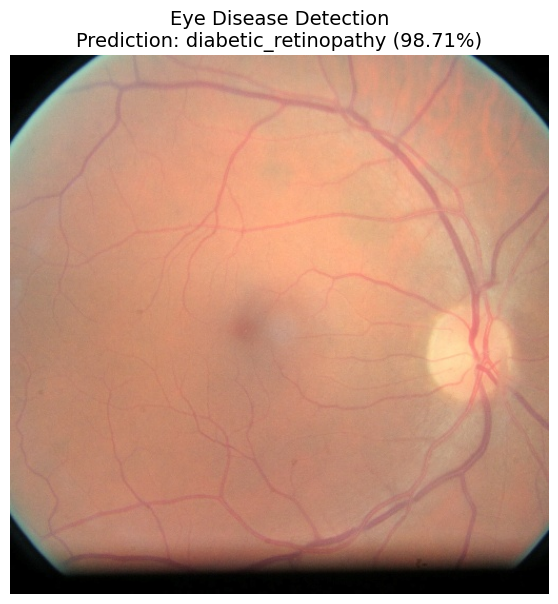

Predicted Class: diabetic_retinopathy
Confidence: 98.71%


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("eyes_disease_detection.h5")

# Define class names (must match training)
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Load image
img_path = r"C:\Users\Acer\OneDrive\Documents\Datasets\Eyes_Dataset\Train\diabetic_retinopathy\100_left.jpeg"
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("❌ Image not found. Check path!")

# Resize to model input size
img_resized = cv2.resize(img, (256, 256))

# Normalize (IMPORTANT)
img_resized = img_resized / 255.0

# Expand dims
img_input = np.expand_dims(img_resized, axis=0)

# Predict
pred = model.predict(img_input, verbose=0)
class_id = np.argmax(pred)
confidence = pred[0][class_id] * 100
label = class_names[class_id]

# Display
plt.figure(figsize=(7, 7))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Eye Disease Detection\nPrediction: {label} ({confidence:.2f}%)", fontsize=14)
plt.axis("off")
plt.show()

# Print
print(f"Predicted Class: {label}")
print(f"Confidence: {confidence:.2f}%")
